# MRI and Alzheimers 
## BIOF509 Spring 2019 Frinal Project

## Import datasets
#### (Cross_sectional & longitudinal)

In [14]:
# This project is trying to find the best method to predict whether the patient will get
# Dementia/Alzheimers or not given the data
# Data should not be combined, each dataset should not be used individually only.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# merge two datasets
# mri_cross = pd.read_csv('oasis_cross-sectional.csv', sep = ',')
mri_long = pd.read_csv('oasis_longitudinal.csv', sep = ',')
mri_long.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [15]:
# closer look to the score and labels
mri_long.groupby(['CDR', 'Group']).size().unstack()

Group,Converted,Demented,Nondemented
CDR,,,
0.0,18.0,NaN,188.0
0.5,19.0,102.0,2.0
1.0,NaN,41.0,NaN
2.0,NaN,3.0,NaN


## Preprocess 

In [16]:
# preprocessing the response variable
# In the longitudinal data, 'Converted' --> 'Dementated' according to the data descriptions
# encode CDR 0/0.5 --> 'Demented', 1/2 --> 'Nondemented'
# nonono let's set CDR as responder

In [17]:
# keep the columns
# mri_cross.rename(columns = {'ID': 'MRI ID', 'Educ': 'EDUC', 'Delay': 'MR Delay'}, inplace = True)
# col = ['MRI ID', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF', 'MR Delay']
# mri_1 = mri_cross[col]
# mri_2 = mri_long[col]

In [18]:
mri_long.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [32]:
# the data contains more than one visits, we only keep single visit = 1
# no converted patients included
# MR Delay == 0
df = mri_long.loc[mri_long['Visit'] == 1]
df = df.drop(['MRI ID', 'Visit', 'Hand', 'MR Delay'], axis = 1)

## Data Exploration

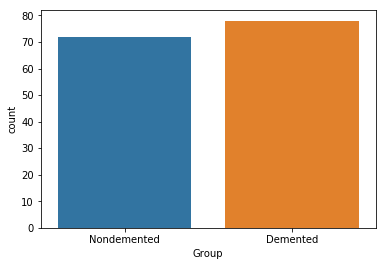

In [33]:
# Demented > ND at patients' initial visit

sns.countplot(x = 'Group', data = df)

In [34]:
# converted --> Demented
# df['Group'] = df['Group'].replace(['Converted'],['Demented'])
# sns.countplot(x = 'Group', data = df)

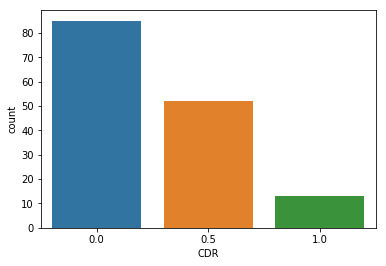

In [35]:
sns.countplot(x = 'CDR', data= df)

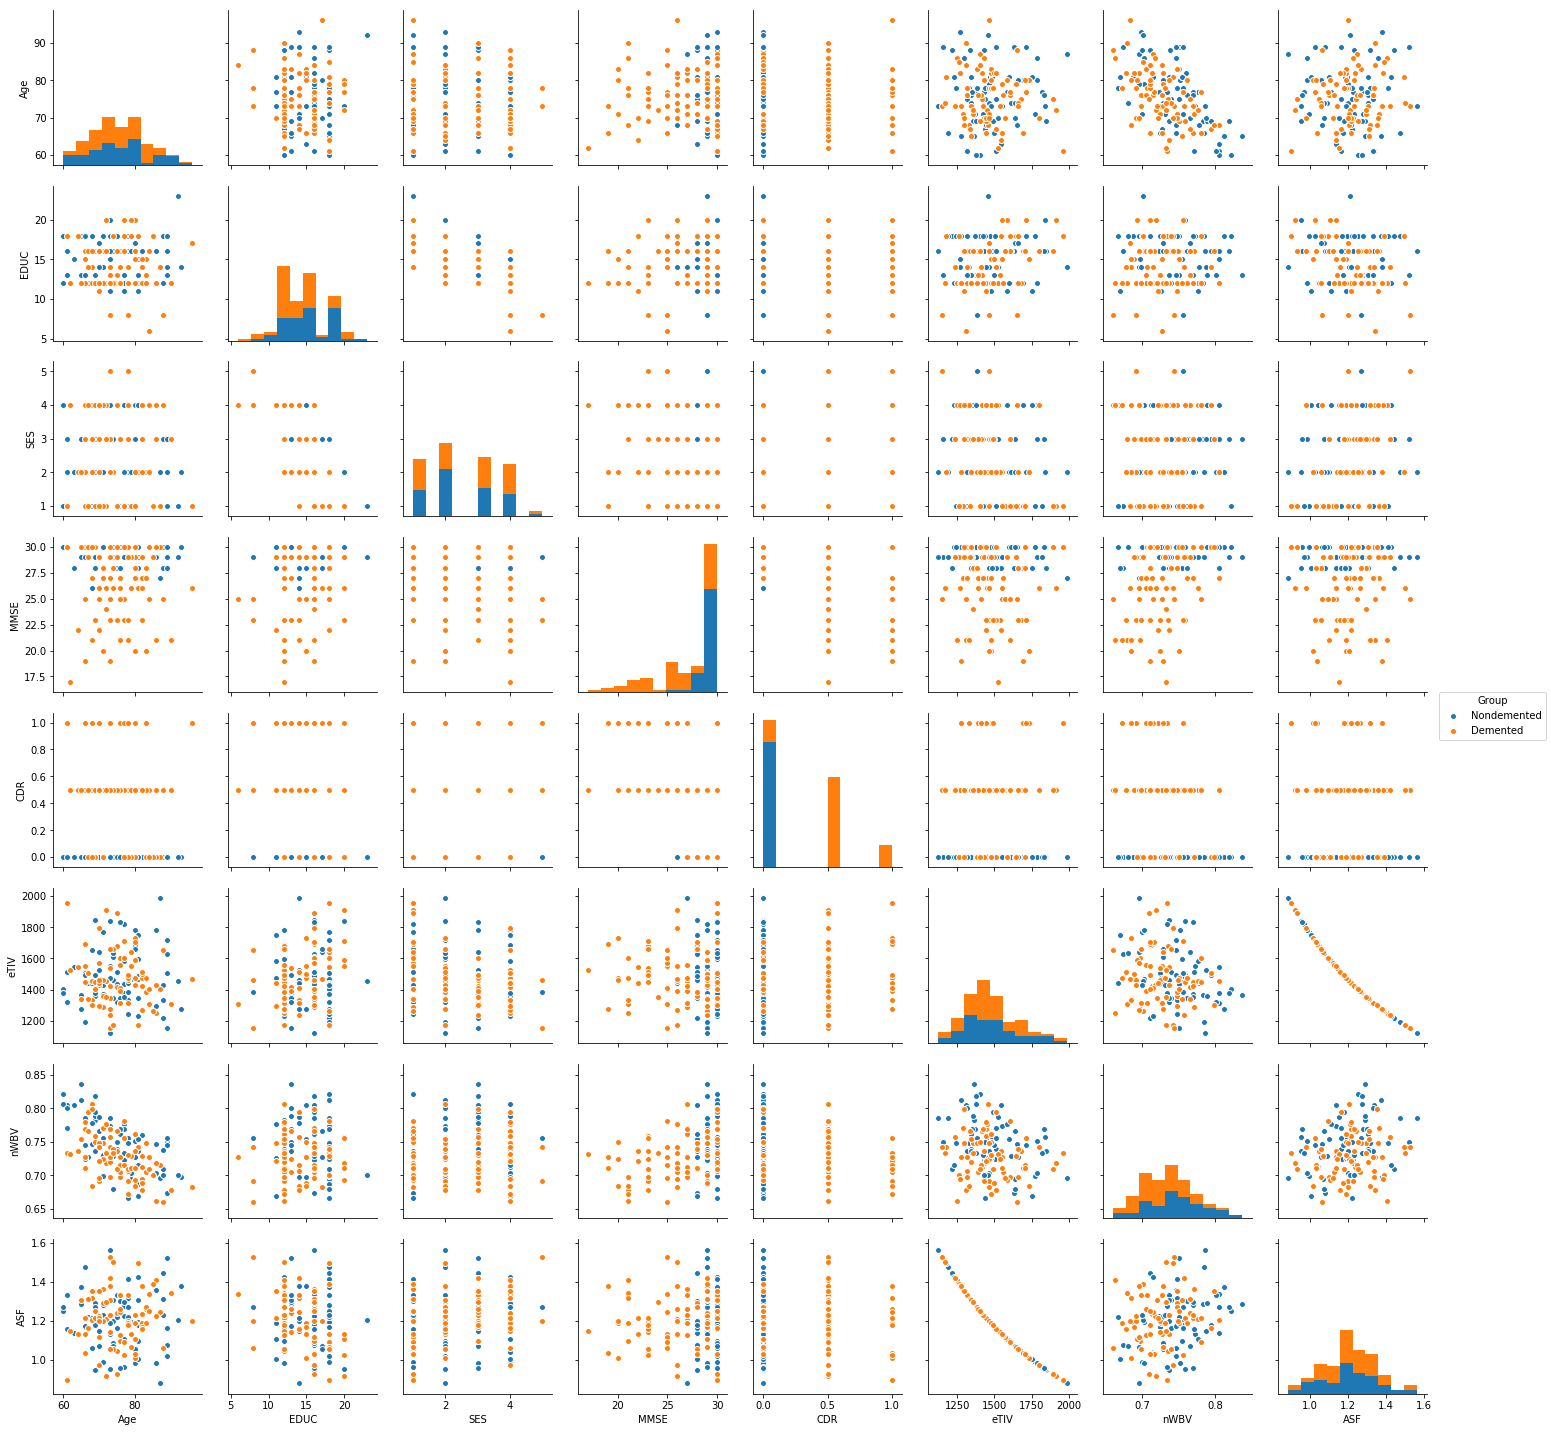

In [36]:
# multicolinearity exists
sns.pairplot(df, hue = 'Group')

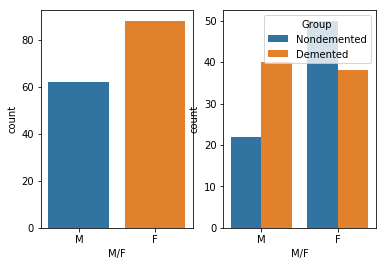

In [47]:
# lets see 'Group' relationships with other predictors one by one
fig, ax = plt.subplots(1, 2)
# Gender: M/F
# female > male in this dataset
sns.countplot(x = 'M/F', data = df, ax = ax[0])
# Demented male > ND male ; ND female > Demented female
# female less likely to be Demented than male
sns.countplot(x = 'M/F', hue = 'Group', data = df, ax = ax[1])

In [49]:
# related to age
men = (df.M/F == 'M')
women = (df.M/F == 'F')

with sns.axes_style(style=None):
    sns.violinplot("Age", "split_frac", hue="Group", data=data,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

AttributeError: 'DataFrame' object has no attribute 'M'

##### Remove missing values

In [ ]:
mri_long1 = mri_long.dropna()

# normalization


In [ ]:
predictors = ['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF', 'MR Delay', 'Visit', 'CDR']
X = mri_long[predictors]
y = mri_long['Group']

In [ ]:
mri_df = pd.concat([pd.DataFrame(X), pd.DataFrame({'label': y})], axis = 1)
sns.pairplot(mri_df, hue = 'label') 

In [ ]:
mri_long.groupby(['Subject ID', 'Group']).size().unstack()

In [ ]:
mri_cross = pd.read_csv('oasis_cross-sectional.csv', sep = ',')
print(mri_cross.shape)
print(mri_cross.dtypes)
# mri_cross.head()

predictors = ["M/F","Hand","Age","Educ","SES","MMSE","eTIV","nWBV","ASF"]
X = mri_cross[predictors]
y = mri_cross['CDR']

# look at the categorical predictors -- M/F and Hand
# number of female > male
gd = mri_cross['M/F'].value_counts().plot(kind = 'bar',
                                         title = 'Barplot of gender')
gd.set_xlabel('Gender')
gd.set_ylabel('Count')
plt.show()